<a href="https://colab.research.google.com/github/Jefferson-Antonio/Implementa-o-e-An-lise-do-Algoritmo-de-Regress-o-Linear/blob/main/Projeto_Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Exploratória**

Saving top_insta_influencers_data.csv to top_insta_influencers_data.csv
Primeiras linhas do dataset:
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 19

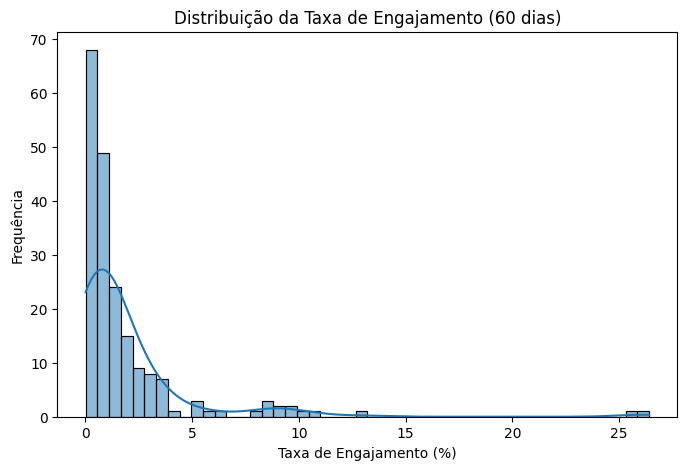

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload do arquivo CSV
from google.colab import files
uploaded = files.upload()

# Carregando o CSV
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Verificando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

# Informações gerais e tipos de dados
print("\nInformações sobre o dataset:")
print(data.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())

# Convertendo a coluna '60_day_eng_rate' para formato numérico
data['60_day_eng_rate'] = data['60_day_eng_rate'].str.replace('%', '').astype(float)

# Visualizando a distribuição da taxa de engajamento
plt.figure(figsize=(8, 5))
sns.histplot(data['60_day_eng_rate'], kde=True)
plt.title("Distribuição da Taxa de Engajamento (60 dias)")
plt.xlabel("Taxa de Engajamento (%)")
plt.ylabel("Frequência")
plt.show()



**Implementação do Algoritmo de Regressão Linear:**

Primeiras linhas do dataset:
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Coun

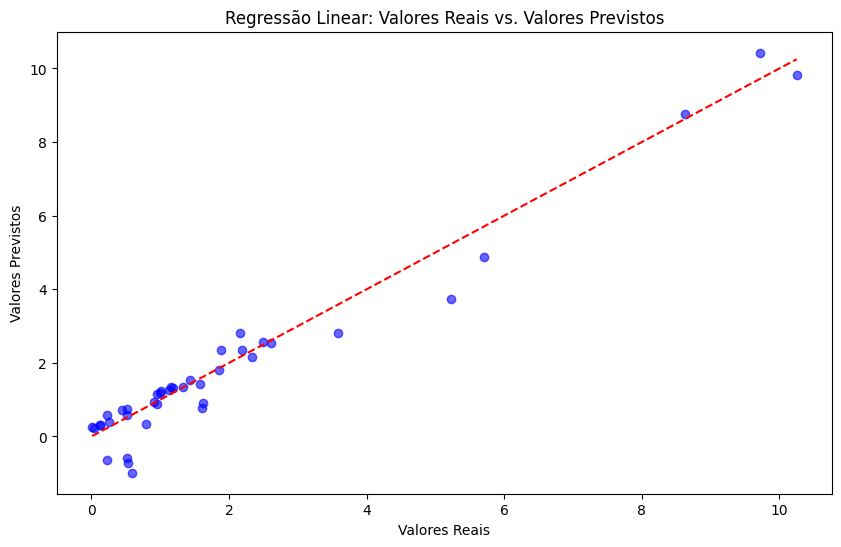

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Carregando o dataset
data = pd.read_csv("top_insta_influencers_data.csv")

# 2. Análise Exploratória
print("Primeiras linhas do dataset:")
print(data.head())

print("\nInformações sobre o dataset:")
print(data.info())

print("\nEstatísticas descritivas:")
print(data.describe())

print("\nValores ausentes por coluna:")
print(data.isnull().sum())

# 3. Preprocessamento dos Dados
# Convertendo colunas numéricas de strings para float
data['posts'] = data['posts'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['followers'] = data['followers'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['avg_likes'] = data['avg_likes'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['new_post_avg_like'] = data['new_post_avg_like'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['total_likes'] = data['total_likes'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)

# Convertendo a taxa de engajamento para formato numérico
data['60_day_eng_rate'] = data['60_day_eng_rate'].astype(str).str.replace('%', '').astype(float)

# Verificando as colunas após a conversão
print("\nVisualização das colunas numéricas:")
print(data[['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']].head())
print(data['60_day_eng_rate'].head())

# 4. Tratamento de valores nulos
print("\nValores nulos em '60_day_eng_rate':", data['60_day_eng_rate'].isnull().sum())
data = data.dropna(subset=['60_day_eng_rate'])

# 5. Seleção das Variáveis Independentes e Dependente
features = ['influence_score', 'posts', 'followers', 'avg_likes', 'new_post_avg_like']
X = data[features]
y = data['60_day_eng_rate']

# 6. Divisão do Conjunto de Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Implementação da Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Fazendo Previsões
y_pred = model.predict(X_test)

# 9. Avaliação do Modelo
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAvaliação do Modelo:")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 10. Visualização dos Resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Linear: Valores Reais vs. Valores Previstos")
plt.show()


**Após otimizações e ajustes:**


Métricas para o Gradiente Descendente:
MAE: 2.0377, RMSE: 2.1284, R²: 0.2655

Métricas para Mínimos Quadrados:
MAE: 0.4034, RMSE: 0.5714, R²: 0.9471

Métricas para Lasso:
MAE: 0.3407, RMSE: 0.5065, R²: 0.9584

Métricas para Ridge:
MAE: 0.4036, RMSE: 0.5714, R²: 0.9471

Validação Cruzada (Mínimos Quadrados): 3.4855442374479795


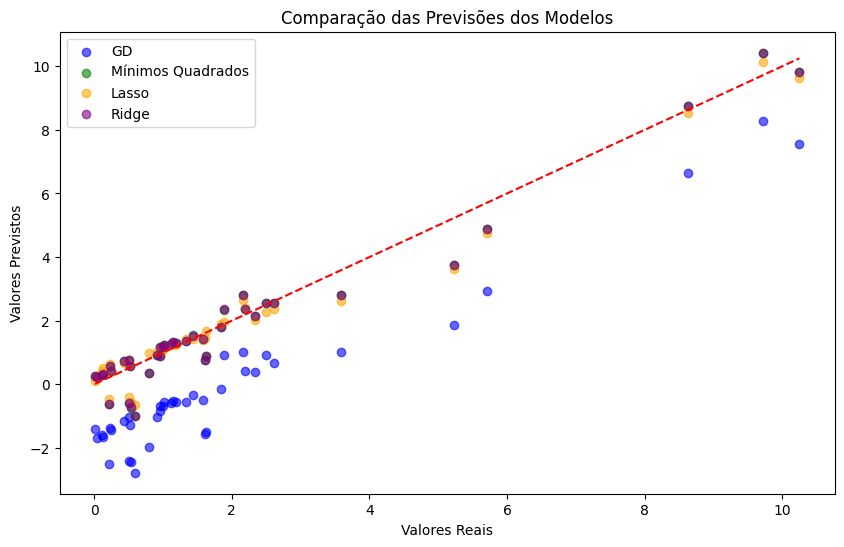

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Carregando o dataset
data = pd.read_csv("top_insta_influencers_data.csv")

# Convertendo colunas numéricas de strings para float
data['posts'] = data['posts'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['followers'] = data['followers'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['avg_likes'] = data['avg_likes'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['new_post_avg_like'] = data['new_post_avg_like'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').astype(float)
data['total_likes'] = data['total_likes'].astype(str).fillna('0').str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)

# Convertendo a taxa de engajamento para formato numérico
data['60_day_eng_rate'] = data['60_day_eng_rate'].astype(str).str.replace('%', '').astype(float)

# Tratamento de valores nulos
data = data.dropna(subset=['60_day_eng_rate'])

# Seleção das variáveis Independentes e Dependente
features = ['influence_score', 'posts', 'followers', 'avg_likes', 'new_post_avg_like']
X = data[features]
y = data['60_day_eng_rate']

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão do Conjunto de Dados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Implementação do Gradiente Descendente
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Treinando com Gradiente Descendente
theta_optimal = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

# Fazendo Previsões com Gradiente Descendente
y_pred_gd = X_test.dot(theta_optimal)

# 2. Mínimos Quadrados
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_ls = lin_reg.predict(X_test)

# 3. Regularização Lasso (L1) e Ridge (L2)
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# 4. Avaliação dos Modelos
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Gradiente Descendente
mae_gd, rmse_gd, r2_gd = evaluate_model(y_test, y_pred_gd)

# Mínimos Quadrados
mae_ls, rmse_ls, r2_ls = evaluate_model(y_test, y_pred_ls)

# Lasso
mae_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)

# Ridge
mae_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)

# Exibindo as Métricas
print("\nMétricas para o Gradiente Descendente:")
print(f"MAE: {mae_gd:.4f}, RMSE: {rmse_gd:.4f}, R²: {r2_gd:.4f}")

print("\nMétricas para Mínimos Quadrados:")
print(f"MAE: {mae_ls:.4f}, RMSE: {rmse_ls:.4f}, R²: {r2_ls:.4f}")

print("\nMétricas para Lasso:")
print(f"MAE: {mae_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.4f}")

print("\nMétricas para Ridge:")
print(f"MAE: {mae_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.4f}")

# 5. Validação Cruzada
cv_scores = cross_val_score(lin_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("\nValidação Cruzada (Mínimos Quadrados):", -cv_scores.mean())

# 6. Visualização dos Resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gd, color='blue', alpha=0.6, label='GD')
plt.scatter(y_test, y_pred_ls, color='green', alpha=0.6, label='Mínimos Quadrados')
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.6, label='Lasso')
plt.scatter(y_test, y_pred_ridge, color='purple', alpha=0.6, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Comparação das Previsões dos Modelos")
plt.legend()
plt.show()
